* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Model: "or_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 1.3930 - accuracy: 0.2500
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 1.3837 - accuracy: 0.2500
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 1.3707 - accuracy: 0.2500
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 1.3551 - accuracy: 0.2500
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.3364 - accuracy: 0.2500
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 1.3139 - accuracy: 0.2500
Epoch 7/200

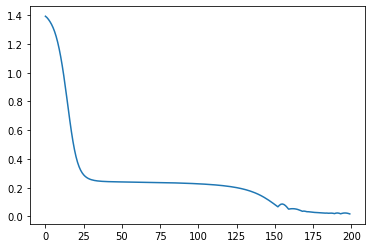

In [2]:
%%time
# 論理和を学習するためのデータを準備
x = np.array([[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])  # x1 と x2 の入力を 4パターン準備
y = np.array([0.0, 1.0, 1.0, 1.0])  # True(1)/False(0) の出力を準備

# ニューラルネットワークのモデルを作成 (サマリを表示)
or_model = tf.keras.models.Sequential(name='or_model') # ニューラルネットワークのモデルの箱を用意
or_model.add(tf.keras.Input(shape=(2,))) # 2入力の入力層 （add でレイヤ(層)等を順に追加していく）
or_model.add(tf.keras.layers.Dense(units=1, activation='tanh')) # セル1個の出力層を用意、活性化関数は tanh
or_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
or_model.compile(loss='mean_absolute_error', # 学習時の損失関数
                 optimizer=tf.optimizers.Adam(learning_rate=0.05), # 最適化関数と学習率
                 metrics=['accuracy'])  # 評価関数
history = or_model.fit(x, y, epochs=200, verbose=1) # fit関数で学習を実施 (verboseを設定して学習中のlossを表示)
plt.plot(history.history['loss']) # 学習中のlossの変化をグラフで表示

# 学習で利用したデータと、モデルで推測した結果を表示
print(x)
print(or_model.predict(x, verbose=0))